📊 **Análise de Faturamento Mensal**
1. Total bruto e líquido por mês.
2. Comparativo mês a mês (crescimento ou queda).
3. Identificar sazonalidades e picos de venda.

**✅ Pré-requisitos**

In [1]:
pip install pandas matplotlib openpyxl

Note: you may need to restart the kernel to use updated packages.


**📜 Código Python**

In [2]:
# Importando bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 1. Ler os dados do Excel
arquivo = 'dados.xlsx'
df = pd.read_excel("/kaggle/input/dataset/dados.xlsx")

In [8]:
# 2. Converter coluna de data para datetime
df['data_venda'] = pd.to_datetime(df['data_venda'])

In [9]:
# 3. Criar coluna 'Ano-Mês' para agrupamento mensal
df['Ano_Mes'] = df['data_venda'].dt.to_period('M')

In [10]:
# 4. Agrupar por mês e calcular total bruto e líquido
faturamento_mensal = df.groupby('Ano_Mes').agg({
    'valor total bruto': 'sum',
    'valor total liquido': 'sum'
}).reset_index()

In [11]:
# 5. Calcular crescimento mês a mês
faturamento_mensal['Crescimento Bruto (%)'] = faturamento_mensal['valor total bruto'].pct_change() * 100
faturamento_mensal['Crescimento Líquido (%)'] = faturamento_mensal['valor total liquido'].pct_change() * 100

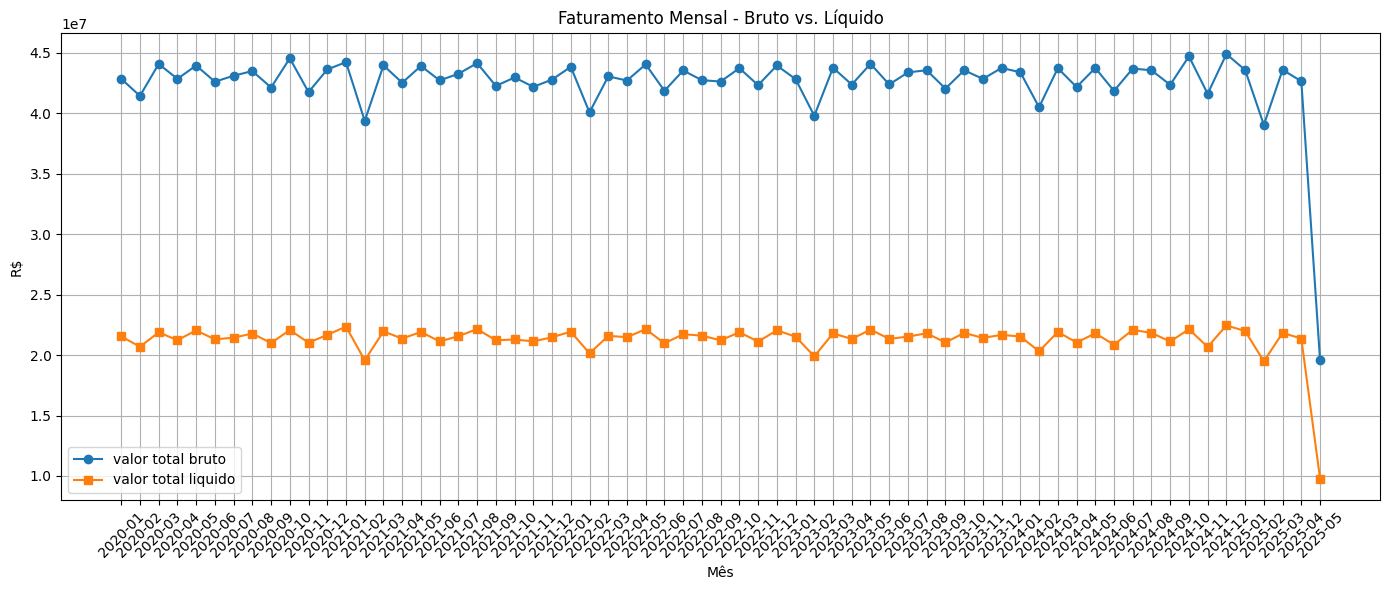

In [12]:
# 6. Visualização
plt.figure(figsize=(14, 6))
plt.plot(faturamento_mensal['Ano_Mes'].astype(str), faturamento_mensal['valor total bruto'], label='valor total bruto', marker='o')
plt.plot(faturamento_mensal['Ano_Mes'].astype(str), faturamento_mensal['valor total liquido'], label='valor total liquido', marker='s')
plt.title('Faturamento Mensal - Bruto vs. Líquido')
plt.xlabel('Mês')
plt.ylabel('R$')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# 7. Exibir os dados com crescimento
print(faturamento_mensal)

    Ano_Mes  valor total bruto  valor total liquido  Crescimento Bruto (%)  \
0   2020-01           42852807          21542620.97                    NaN   
1   2020-02           41442016          20691008.12              -3.292179   
2   2020-03           44084243          21883521.70               6.375720   
3   2020-04           42851132          21234378.71              -2.797170   
4   2020-05           43955704          22040279.81               2.577696   
..      ...                ...                  ...                    ...   
60  2025-01           43585431          21992080.21              -2.933247   
61  2025-02           39044380          19480725.83             -10.418736   
62  2025-03           43602372          21836857.40              11.673875   
63  2025-04           42652442          21367000.96              -2.178620   
64  2025-05           19582271           9769577.45             -54.088746   

    Crescimento Líquido (%)  
0                       NaN  
1  

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
